# HW2, Myunghee Lee (USC ID: 2446752777)

1. Combined Cycle Power Plant Data Set

In [1]:
# read 'Sheet1' of 'Excel file'

import numpy as np
import pandas as pd

fname = 'Folds5x2_pp.xlsx'
excel = pd.ExcelFile(fname)
df1 = excel.parse('Sheet1')
print(df1)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76

1. (b) Exploring the data: 

i. How many rows are in this data set? How many columns? What do the rows and columns represent? 

(Answer)
9568 rows x 5 columns

rows: observations

columns: 

AT(hourly average ambient variables Temperature) - independant variable, predictor,  predictfeature 0

V(Exhaust Vacuum) - independant variable, predictor, feature 1
         
AP(Ambient Pressure) - independant variable, predictor, feature 2
     
RH(Relative Humidity) - independant variable, predictor, feature 3
         
PE(net hourly electrical energy output) - dependant variable, response

1. (b) Exploring the data:

ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable.

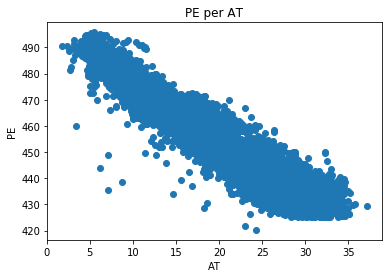

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df1.iloc[:,0], df1.iloc[:,4])
plt.title('PE per AT')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

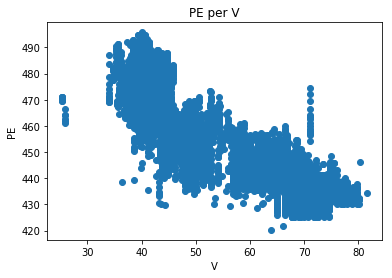

In [4]:
plt.scatter(df1.iloc[:,1], df1.iloc[:,4])
plt.title('PE per V')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

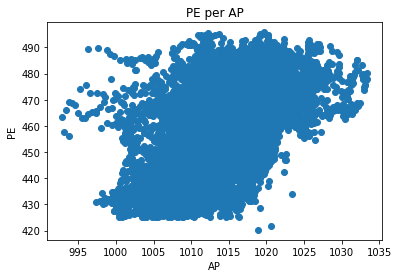

In [5]:
plt.scatter(df1.iloc[:,2], df1.iloc[:,4])
plt.title('PE per AP')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

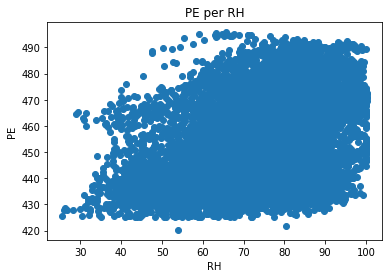

In [6]:
plt.scatter(df1.iloc[:,3], df1.iloc[:,4])
plt.title('PE per RH')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

1. (b) Exploring the data:

ii. Describe your ﬁndings.

(Answer)

Each AT and V seems to have inverse linear relationship with PE. 
Each AP and RH does not seem to have linear relationship with PE because AP and RH seem to have much more outliers than AT and V. 

1. (b) Exploring the data:

iii. What are the mean, the median, range, ﬁrst and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table. 

In [7]:
import statistics 
  
dic = dict ()
for i in range(5):
    mean = statistics.mean(df1.iloc[:,i])
    med = statistics.median(df1.iloc[:,i])
    mx = max(df1.iloc[:,i])
    mn = min(df1.iloc[:,i])
    rng= mx-mn
    Q1 = df1.iloc[:,i].quantile(0.25)
    Q3 = df1.iloc[:,i].quantile(0.75)
    IQR = Q3 - Q1
    dic[i] = mean, med, rng, Q1, Q3, IQR

table = pd.DataFrame(dic, ["mean","median","range", "Q1", "Q3","IQR"]).T
table.rename(index={0:'AT', 1:'V', 2 : 'AP', 3: 'RH', 4: 'PE'}, inplace = True)

print(table)

           mean    median  range         Q1       Q3      IQR
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


A. AT
1. (c) For each predictor, ﬁt a simple linear regression model to predict the response. 

In [8]:
# A. Simple linear regression using a single predictor feature 0 (AT)
# y = b0 + b1*AT + e

import statsmodels.formula.api as smf # to use OLS for linear regression 

Lreg = smf.ols(formula='PE ~ AT', data=df1).fit()  # formula: response (PE) ~ predictors (AT)

b1 = Lreg.params[1]  # extract b1 for question 1. (e)
s_coeff = dict ()
s_coeff['AT'] = b1

Lreg.summary()  # table of regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:15:40   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A. AT
1. (c)  Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? 

(Answer) R-squared (0.899) is high, so the simple linear regression model for AT seems to be fit the data. Furthermore, p-value of AT is smaller than the cutoff for rejecting the null hypothesis (5%), so AT is statistically significant.

A. AT
1. (C) Create a plot to back up your assertions.

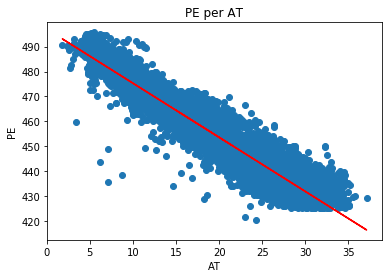

In [9]:
# plot
AT = df1.iloc[:, 0]      # independent variable: AT
y = df1.iloc[:,4]        # dependent variable
y_pred = Lreg.predict(AT)  # prediction of AT

plt.scatter(AT, y)
plt.plot(AT, y_pred, color='red')
plt.title('PE per AT')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

A. AT
1. (c) Are there any outliers that you would like to remove from your data for each of these regression tasks? 

(Answer) Yes. I would like to remove several points far from the red line. 

B. V
1. (c) For each predictor, ﬁt a simple linear regression model to predict the response. 

In [10]:
# B. Simple linear regression using a single predictor feature 1 (V)
# y = b0 + b1*V + e   

Lreg = smf.ols(formula='PE ~ V', data=df1).fit()  # formula: response (PE) ~ predictors (V)

b1 = Lreg.params[1]        # extract b1 for question 1. (e)
s_coeff['V'] = b1

Lreg.summary()  # table of regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:16:18   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B. V
1. (c)  Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? 

(Answer) R-squared (0.757) is quite high, so the simple linear regression model for V seems to be fit the data. Furthermore, p-value of V is smaller than the cutoff for rejecting the null hypothesis (5%), so V is statistically significant.

B. V
1. (C) Create a plot to back up your assertions.

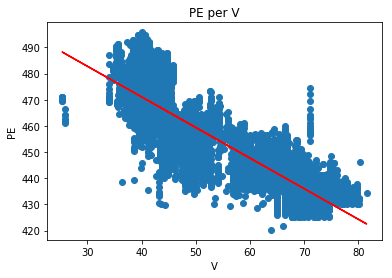

In [11]:
# plot
V = df1.iloc[:, 1]       # independent variable: V
y_pred = Lreg.predict(V)  # prediction of V

plt.scatter(V, y)
plt.plot(V, y_pred, color='red')
plt.title('PE per V')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

B. V
1. (c) Are there any outliers that you would like to remove from your data for each of these regression tasks? 

(Answer) Yes. I would like to remove several points far from the red line. 

C. AP
1. (c) For each predictor, ﬁt a simple linear regression model to predict the response. 

In [12]:
# C. Simple linear regression using a single predictor feature 2 (AP)
# y = b0 + b1*AP + e

Lreg = smf.ols(formula='PE ~ AP', data=df1).fit()  # formula: response (PE) ~ predictors (AP)

b1 = Lreg.params[1]       # extract b1 for question 1. (e)
s_coeff['AP'] = b1

Lreg.summary()  # table of regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:16:36   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C. AP
1. (c)  Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? 

(Answer) R-squared (0.269) is low, so the simple linear regression model for AP does not seem to be fit the data. However, p-value of AP is smaller than the cutoff for rejecting the null hypothesis (5%), so AP is statistically significant.

C. AP
1. (C) Create a plot to back up your assertions.

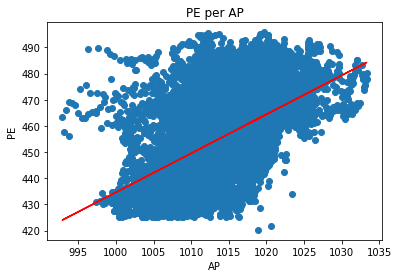

In [13]:
# plot
AP = df1.iloc[:, 2]      # independent variable: AP
y_pred = Lreg.predict(AP)   # prediction of AP

plt.scatter(AP, y)
plt.plot(AP, y_pred, color='red')
plt.title('PE per AP')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

C. AP
1. (c) Are there any outliers that you would like to remove from your data for each of these regression tasks? 

(Answer) Yes. There are too many outliers not fitting into the red line. 

D. RH
1. (c) For each predictor, ﬁt a simple linear regression model to predict the response. 

In [14]:
# B. Simple linear regression using a single predictor feature 3 (RH)
# y = b0 + b1*RH + e

Lreg = smf.ols(formula='PE ~ RH', data=df1).fit()  # formula: response (PE) ~ predictors (RH)

b1 = Lreg.params[1]    # extract b1 for question 1. (e)
s_coeff['RH'] = b1

Lreg.summary()  # table of regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:16:57   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

D. RH
1. (c)  Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? 

(Answer) R-squared (0.152) is low, so the simple linear regression model for RH does not seem to be fit the data. However, p-value of RH is smaller than the cutoff for rejecting the null hypothesis (5%), so RH is statistically significant.

D. RH
1. (C) Create a plot to back up your assertions.

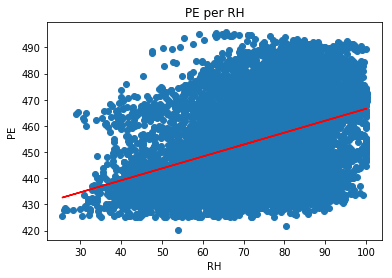

In [15]:
# plot
RH = df1.iloc[:, 3]      # independent variable: RH
y_pred = Lreg.predict(RH)   # prediction of RH

plt.scatter(RH, y)
plt.plot(RH, y_pred, color='red')
plt.title('PE per RH')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

D. RH
1. (c) Are there any outliers that you would like to remove from your data for each of these regression tasks? 

(Answer) Yes. There are too many outliers not fitting into the red line.

1. (d) Fit a multiple regression model to predict the response using all of the predictors. 

In [16]:
# y = b0 + b1*AT + b2*V + b3*AP + b4*RH + e

Lreg = smf.ols(formula='PE ~ AT + V + AP + RH', data=df1).fit()

mul_coeff = Lreg.params[1:]  # extract b1, b2, b3 and b4 for question 1. (e)

Lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:18:09   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. (d) Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0? 

(Answer) 

R-squared (0.929) is very high, so the multiple regression model seems to be fit the data. Furthermore, p-values of all features - AT, V, AP, RH - are smaller than the cutoff for rejecting the null hypothesis (5%), so all features are statistically significant, and we fail to reject the null hypothesis. 

1. (e) How do your results from 1c compare to your results from 1d? 

In [17]:
s_cof = pd.DataFrame(s_coeff, index=[1]).T    # the univariate regression coeﬃcients (b1s) from 1c
coeff = pd.concat([s_cof, mul_coeff], axis=1)   # mul_coeff: the multiple regression coeﬃcients from 1d 

coeff.rename(columns={1:'single', 0:'multi'}, inplace = True)

print(coeff)

      single     multi
AT -2.171320 -1.977513
V  -1.168135 -0.233916
AP  1.489872  0.062083
RH  0.455650 -0.158054


(Answer)

In both 1c and 1d, all features - AT, V, AP, RH - are statistically significant, but coefficients are different. 

1. (e) Create a plot displaying the univariate regression coeﬃcients from 1c on the x-axis, and the multiple regression coeﬃcients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeﬃcient in a simple linear regression model is shown on the x-axis, and its coeﬃcient estimate in the multiple linear regression model is shown on the y-axis. 

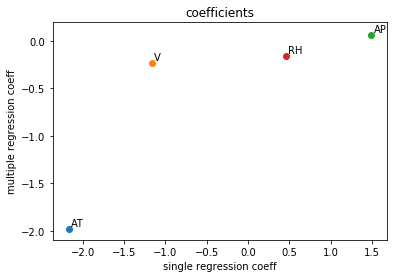

In [18]:
# simulating a pandas df['type'] column
labels = ['AT', 'V', 'AP', 'RH']

for i, label in enumerate(labels):
    x_value = coeff.iloc[i, 0]
    y_value = coeff.iloc[i, 1]
    plt.scatter(x_value, y_value)
    plt.text(x_value+0.03, y_value+0.03, label, fontsize=10)

plt.title('coefficients')
plt.xlabel('single regression coeff')
plt.ylabel('multiple regression coeff')
plt.show()

1. (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, ﬁt a model of the form

Y = β0 + β1X + β2X^2 + β3X^3 + e

In [19]:
# independent variable: AT = df1.iloc[:, 0]
# y = b0 + b1*AT + b2*AT^2 + b3*AT^3 + e

Lreg = smf.ols(formula='PE ~ AT + I(AT**2) + I(AT**3)', data=df1).fit()
Lreg.summary()  # table of regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:18:54   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.000     491.409     494.047
AT            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
I(AT ** 2)    -0.1251      0.007    -18.199      0.000      -0.139      -0.112
I(AT ** 3)     0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(Answer)

R-squared (0.912) is higher than R-squared (0.899) of the simple linear regression model for AT, so this model seems to be more fit the data. Furthermore, p-values of AT, AT^2 and AT^3 are smaller than the cutoff for rejecting the null hypothesis (5%), so AT, AT^2 and AT^3 are statistically significant.

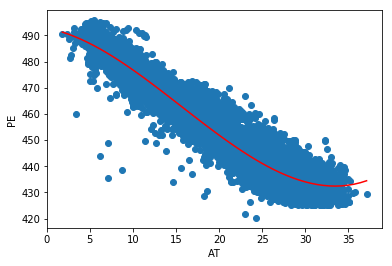

In [20]:
# plot
b0=Lreg.params[0]
b1=Lreg.params[1]
b2=Lreg.params[2]
b3=Lreg.params[3]

x_0 = np.linspace(min(AT), max(AT))
y_0 = b0 + b1*x_0 + b2*(x_0)**2 + b3*(x_0)**3  

plt.scatter(AT, y)   # original data
plt.plot(x_0, y_0, color='red') 
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

In [21]:
# independent variable: V = df1.iloc[:, 1]
# y = b0 + b1*V + b2*V^2 + b3*V^3 + e

Lreg = smf.ols(formula='PE ~ V + I(V**2) + I(V**3)', data=df1).fit()
Lreg.summary()  # table of regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:19:16   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.000     536.209     572.084
V             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
I(V ** 2)     -0.0027      0.009     -0.294      0.768      -0.021       0.015
I(V ** 3)      0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(Answer)

R-squared (0.775) is higher than R-squared (0.757) of the simple linear regression model for V, so this model seems to be more fit the data. Furthermore, p-values of V and V^3 are smaller than the cutoff for rejecting the null hypothesis (5%), so V and V^3 are statistically significant, but p-value of V^2 is larger than the cutoff, so V^2 is not statistically significant.

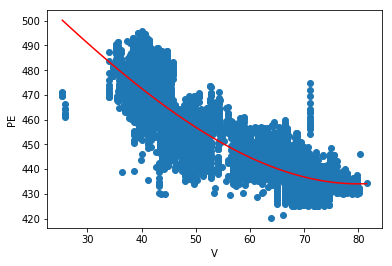

In [22]:
# plot
b0=Lreg.params[0]
b1=Lreg.params[1]
b2=Lreg.params[2]
b3=Lreg.params[3]

x_1 = np.linspace(min(V), max(V))
y_1 = b0 + b1*x_1 + b2*(x_1)**2 + b3*(x_1)**3  

plt.scatter(V, y) # original data
plt.plot(x_1, y_1, color='red')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

In [23]:
# independent variable: AP = df1.iloc[:, 2]
# y = b0 + b1*AP + b2*AP^2 + b3*AP^3 + e

Lreg = smf.ols(formula='PE ~ AP + I(AP**2) + I(AP**3)', data=df1).fit()
Lreg.summary()  # table of regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:19:55   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
AP            25.2556      3.001      8.415      0.000      19.372      31.139
I(AP ** 2)    -0.0500      0.006     -8.439      0.000      -0.062      -0.038
I(AP ** 3)  2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(Answer) 

Even though R-squared (0.275) is higher than R-squared (0.269) of the simple linear regression model for AP, the R-squared is low, so this model does not seem to be fit the data. However, p-values of AP, AP^2 and AP^3 are smaller than the cutoff for rejecting the null hypothesis(5%), so AP, AP^2 and AP^3 are statistically significant.

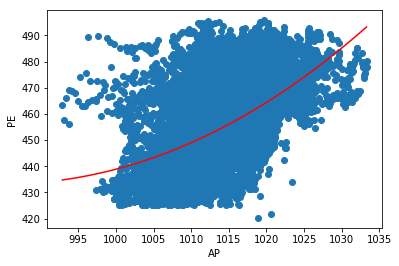

In [24]:
# plot
b0=Lreg.params[0]
b1=Lreg.params[1]
b2=Lreg.params[2]
b3=Lreg.params[3]

x_2 = np.linspace(min(AP), max(AP))
y_2 = b0 + b1*x_2 + b2*(x_2)**2 + b3*(x_2)**3  

plt.scatter(AP, y) # original data
plt.plot(x_2, y_2, color='red')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

In [25]:
# independent variable: RH = df1.iloc[:, 3]
# y = b0 + b1*RH + b2*RH^2 + b3*RH^3 + e

Lreg = smf.ols(formula='PE ~ RH + I(RH**2) + I(RH**3)', data=df1).fit()
Lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:20:24   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.000     447.744     489.083
RH            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
I(RH ** 2)     0.0321      0.007      4.433      0.000       0.018       0.046
I(RH ** 3)    -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(Answer) 

Even though R-squared (0.154) is slightly higher than R-squared (0.152) of the simple linear regression model for RH, the R-squared is low, so this model does not seem to be fit the data. However, p-values of RH, RH^2 and RH^3 are smaller than the cutoff for rejecting the null hypothesis(5%), so RH, RH^2 and RH^3 are statistically significant.

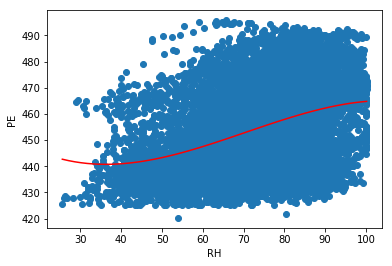

In [26]:
# plot
b0=Lreg.params[0]
b1=Lreg.params[1]
b2=Lreg.params[2]
b3=Lreg.params[3]

x_3 = np.linspace(min(RH), max(RH))
y_3 = b0 + b1*x_3 + b2*(x_3)**2 + b3*(x_3)**3  

plt.scatter(RH, y) # original data
plt.plot(x_3, y_3, color='red')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

Summary of 1. (f)

AT, AT^2 and AT^3 are statistically significant.

V and V^3 are statistically significant, but V^2 is not statistically significant.

AP, AP^2 and AP^3 are statistically significant.

RH, RH^2 and RH^3 are statistically significant.

1. (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically signiﬁcant.

In [27]:
# y = b0 + b1*AT + b2*V × b3*AP + b4*RH 
# + b5*AT*V + b6*AT*AP + b7*AT*RH + b8*V*AP + b9*V*RH + b10*AP*RH + e

Lreg = smf.ols(formula='PE ~ AT+V+AP+RH+ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=df1).fit()
Lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:21:35   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(Answer for 1. (g))

AT:V, AT:RH, V:AP and AP:RH are statistically signiﬁcant since there p-value are smaller than 0.05 for rejecting the null hypothesis. 

AT:AP and V:RH are not statistically signiﬁcant. 

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insigniﬁcant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs. 

In [28]:
# tran data: randomly selected 70% subset of the data
# test data: the rest 30% of the data

from sklearn.model_selection import train_test_split  # to divide training and test data

X = df1.iloc[:, :4] # independent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=15)

data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1) 

C:\Users\Myunghee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
# Improvement 1: using all terms except for insignificant terms based on p-value (from the results of 1. (g) and (f))
# V^2, AT*AP and V*RH are not statistically signiﬁcant. 

# using training data (data = data_train)
Lreg1 = smf.ols(formula='PE ~ AT+V+AP+RH+I(AT**2)+I(AT**3)+I(V**3)+I(AP**2)+I(AP**3)+I(RH**2)+I(RH**3)+ AT*V + AT*RH + V*AP + AP*RH', data=data_train).fit()
Lreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7363.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:24:04   Log-Likelihood:                -19158.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0245      0.004     -6.607      0.000      -0.032      -0.017
AT            -1.5329      0.172     -8.901      0.000      -1.870      -1.195
V             -4.8607      1.078     -4.508      0.000      -6.975      -2.747
AP            -8.2762      1.252     -6.611      0.000     -10.730      -5.822
RH             5.1452      0.825      6.239      0.000       3.528       6.762
I(AT ** 2)    -0.0456      0.008     -6.068      0.000      -0.060      -0.031
I(AT ** 3)     0.0013      0.000      9.121      0.000       0.001       0.002
I(V ** 3)    1.92e-07   4.82e-06      0.040      0.968   -9.26e-06    9.65e-06
I(AP ** 2)     0.0176      0.002      7.229      0.000       0.013       0.022
I(AP ** 3) -8.799e-06   1.18e-06     -7.445      0.000   -1.11e-05   -6.48e-06
I(RH ** 2)    -0.0030      0.002     -1.250      0.211      -0.008       0.002
I(RH ** 3)   5.12e-06   1.17e-05      0.439      0.661   -1.77e-05     2.8e-05
AT:V           0.0032      0.002      1.369      0.171      -0.001       0.008
AT:RH         -0.0038      0.001     -4.014      0.000      -0.006      -0.002
V:AP           0.0045      0.001      4.227      0.000       0.002       0.007
AP:RH         -0.0048      0.001     -5.997      0.000      -0.006      -0.003
==============================================================================
Omnibus:                     1191.905   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8091.552
Skew:                          -0.679   Prob(JB):                         0.00
Kurtosis:                       8.211   Cond. No.                     2.16e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Improvement 2: model 2
#   1. using all terms

# using training data (data = data_train)
Lreg = smf.ols(formula='PE ~ AT+V+AP+RH+I(AT**2)+I(AT**3)+I(V**2)+I(V**3)+I(AP**2)+I(AP**3)+I(RH**2)+I(RH**3)+ AT*V + AT*AP +AT*RH + V*AP + V*RH + AP*RH', data=data_train).fit()
Lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     6121.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:24:13   Log-Likelihood:                -19127.
No. Observations:                6697   AIC:                         3.829e+04
Df Residuals:                    6679   BIC:                         3.841e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0241      0.004     -5.655      0.000      -0.032      -0.016
AT            -3.6355      3.629     -1.002      0.317     -10.750       3.479
V             -2.0321      1.787     -1.137      0.255      -5.534       1.470
AP            -8.1402      1.438     -5.660      0.000     -10.960      -5.321
RH             4.8278      1.029      4.693      0.000       2.811       6.845
I(AT ** 2)    -0.0369      0.008     -4.665      0.000      -0.052      -0.021
I(AT ** 3)     0.0011      0.000      7.501      0.000       0.001       0.001
I(V ** 2)     -0.0462      0.006     -7.746      0.000      -0.058      -0.034
I(V ** 3)      0.0003   3.48e-05      7.675      0.000       0.000       0.000
I(AP ** 2)     0.0172      0.003      6.184      0.000       0.012       0.023
I(AP ** 3) -8.623e-06   1.35e-06     -6.390      0.000   -1.13e-05   -5.98e-06
I(RH ** 2)    -0.0030      0.002     -1.248      0.212      -0.008       0.002
I(RH ** 3)  4.729e-06   1.17e-05      0.405      0.685   -1.81e-05    2.76e-05
AT:V           0.0070      0.003      2.171      0.030       0.001       0.013
AT:AP          0.0018      0.004      0.518      0.604      -0.005       0.009
AT:RH         -0.0044      0.002     -2.491      0.013      -0.008      -0.001
V:AP           0.0041      0.002      2.391      0.017       0.001       0.008
V:RH           0.0001      0.001      0.183      0.855      -0.001       0.002
AP:RH         -0.0044      0.001     -4.486      0.000      -0.006      -0.003
==============================================================================
Omnibus:                     1213.610   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8307.826
Skew:                          -0.692   Prob(JB):                         0.00
Kurtosis:                       8.278   Cond. No.                     2.17e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Improvement 2: model 2
#   2. removing insignificant variables based on linear regression using all terms. 
#   p-values of AT, V, RH^2, RH^3, AT*AP and V*RH are larger than the cutoff for the null(0.05)
#   Because of hierarchy, remove only RH^2, RH^3, AT*AP and V*RH

# using training data (data = data_train)
Lreg2 = smf.ols(formula='PE ~ AT+V+AP+RH+I(AT**2)+I(AT**3)+I(V**2)+I(V**3)+I(AP**2)+I(AP**3)+ AT*V + AT*RH + V*AP + AP*RH', data=data_train).fit()
Lreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7942.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:24:54   Log-Likelihood:                -19154.
No. Observations:                6697   AIC:                         3.834e+04
Df Residuals:                    6683   BIC:                         3.843e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0233      0.004     -6.301      0.000      -0.030      -0.016
AT            -2.2609      0.162    -13.965      0.000      -2.578      -1.944
V             -3.7595      1.103     -3.407      0.001      -5.922      -1.597
AP            -7.8623      1.247     -6.304      0.000     -10.307      -5.417
RH             3.2965      0.782      4.218      0.000       1.764       4.829
I(AT ** 2)    -0.0332      0.008     -4.389      0.000      -0.048      -0.018
I(AT ** 3)     0.0010      0.000      7.234      0.000       0.001       0.001
I(V ** 2)     -0.0449      0.006     -7.540      0.000      -0.057      -0.033
I(V ** 3)      0.0003   3.48e-05      7.396      0.000       0.000       0.000
I(AP ** 2)     0.0169      0.002      6.953      0.000       0.012       0.022
I(AP ** 3) -8.512e-06   1.18e-06     -7.222      0.000   -1.08e-05    -6.2e-06
AT:V           0.0087      0.002      3.626      0.000       0.004       0.013
AT:RH         -0.0001      0.001     -0.150      0.881      -0.002       0.001
V:AP           0.0058      0.001      5.512      0.000       0.004       0.008
AP:RH         -0.0034      0.001     -4.385      0.000      -0.005      -0.002
==============================================================================
Omnibus:                     1185.716   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8022.538
Skew:                          -0.675   Prob(JB):                         0.00
Kurtosis:                       8.189   Cond. No.                     2.16e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(h) Test both models on the remaining points and report your train and test MSEs. 

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=15)

from sklearn.metrics import mean_squared_error # to get men square error (MSE)

# 1. train & test MSEs of Improvement 1: model1

pred_tr1 = Lreg1.predict(X_train) # testing train data
pred_te1 = Lreg1.predict(X_test)  # testing test data

mse_tr1 = mean_squared_error(y_train, pred_tr1) # MSE of train data
mse_te1 = mean_squared_error(y_test, pred_te1)  # MSE of test data

# 2. train & test MSEs of Improvement 2: model 2

pred_tr2 = Lreg2.predict(X_train) # testing train data
pred_te2 = Lreg2.predict(X_test)  # testing test data

mse_tr2 = mean_squared_error(y_train, pred_tr2)  # MSE of train data
mse_te2 = mean_squared_error(y_test, pred_te2)   # MSE of test data

dic = dict()
dic = {"Model 1": (mse_tr1, mse_te1), "Model 2": (mse_tr2, mse_te2) }

mse_tb = pd.DataFrame(dic, ["Train MSE","Test MSE"]).T

print(mse_tb)

         Train MSE   Test MSE
Model 1  17.876685  18.037558
Model 2  17.853785  18.010836


(Answer) Train and test MSEs of model 2 are slightly lower than those of model 1. Thus, model 2, making a regression model involving all possible interaction and nonlinear terms, and then removing insigniﬁcant variables, is better than model 1. 

(i) KNN Regression: 

i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best ﬁt.

In [33]:
from sklearn.neighbors import KNeighborsRegressor # to use KNN Regression

def KNN (X, y, k, tX):    # tX: test data set
    neigh = KNeighborsRegressor(n_neighbors=k)    
    neigh.fit(X, y)
    pred = neigh.predict(tX)
    
    return pred

In [34]:
# 1. raw features
# traning data and test data for KNN regression
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=15)

dic = dict ()
for i in range(100):
    k = i+1    # k = 1,2,3,..,100
    predte = KNN (X_train, y_train, k, X_test)   # testing test data
    
    # calculating error rate
    mse_te = mean_squared_error(y_test, predte) # MSE of test data    
    dic[i] = k, mse_te
    
testER = pd.DataFrame(dic, ["k","MSE_test"]).T

s_testER = testER.sort_values(by=["MSE_test", "k"])  # sorting testER(k, test error) by test error and k
bst_k = int(s_testER.iloc[0, 0])
bst_er = s_testER.iloc[0, 1]

print("k*=", bst_k, "with best test error:", round(bst_er, 3))    
print(s_testER)  # k, test error

k*= 7 with best test error: 15.798
        k   MSE_test
6     7.0  15.798360
5     6.0  15.811529
7     8.0  15.899147
4     5.0  15.954097
8     9.0  16.095707
9    10.0  16.161840
3     4.0  16.252563
10   11.0  16.310007
11   12.0  16.467110
12   13.0  16.484319
13   14.0  16.533780
2     3.0  16.634484
14   15.0  16.696258
15   16.0  16.727485
16   17.0  16.857028
17   18.0  17.009366
18   19.0  17.096918
19   20.0  17.152794
20   21.0  17.279276
21   22.0  17.379551
22   23.0  17.489123
23   24.0  17.620059
24   25.0  17.676915
1     2.0  17.710867
25   26.0  17.732943
26   27.0  17.812404
27   28.0  17.947949
28   29.0  18.051054
29   30.0  18.065137
30   31.0  18.145539
..    ...        ...
71   72.0  20.520511
72   73.0  20.561406
73   74.0  20.622811
74   75.0  20.700403
75   76.0  20.758913
76   77.0  20.800193
77   78.0  20.859417
78   79.0  20.905582
79   80.0  20.946613
80   81.0  21.019922
81   82.0  21.057982
82   83.0  21.089397
83   84.0  21.138536
84   85.0  21.191727

In [36]:
# 2. normalized features (scaling, standardization)
#    A. Scaling X_train, X_test

from sklearn import preprocessing

scaling = preprocessing.MinMaxScaler()
# convert dataframe to array
AT_ar = np.array(AT)  
V_ar = np.array(V)
AP_ar = np.array(AP)
RH_ar = np.array(RH)

newaxis = None
AT_ar = AT_ar[:, newaxis]
V_ar = V_ar[:, newaxis]
AP_ar = AP_ar[:, newaxis]
RH_ar = RH_ar[:, newaxis]

# scaling
scaled_AT = scaling.fit_transform(AT_ar)
scaled_V = scaling.fit_transform(V_ar)
scaled_AP = scaling.fit_transform(AP_ar)
scaled_RH = scaling.fit_transform(RH_ar)

# convert to dataframe
sc_AT =pd.DataFrame(scaled_AT)
sc_V =pd.DataFrame(scaled_V)
sc_AP =pd.DataFrame(scaled_AP)
sc_RH =pd.DataFrame(scaled_RH)

# scaled X
scX = pd.concat([sc_AT, sc_V, sc_AP, sc_RH], axis=1)

# split scaled X, y
scX_tr, scX_te, y_train, y_test = train_test_split(scX, y, train_size=0.7, random_state=15)

C:\Users\Myunghee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
# 2. normalized features (scaling, standardization)
#    A. Scaling (scX_tr, scX_te, y_train, y_test)

dic = dict ()
for i in range(100):
    k = i+1    # k = 1,2,3,..,100
    predte = KNN (scX_tr, y_train, k, scX_te)   # testing scaled test data
  
    # calculating error rate
    mse_te = mean_squared_error(y_test, predte) # MSE of test data    
    dic[i] = k, mse_te
    
stestER = pd.DataFrame(dic, ["k","MSE_test"]).T

s_stestER = stestER.sort_values(by=["MSE_test", "k"])  # sorting testER(k, test error) by test error and k
bst_k = int(s_stestER.iloc[0, 0])
bst_er = s_stestER.iloc[0, 1]

print("k*=", bst_k, "with best test error:", round(bst_er, 3))    
print(s_stestER)  # k, test error

k*= 7 with best test error: 14.499
        k   MSE_test
6     7.0  14.498927
5     6.0  14.576262
7     8.0  14.630806
4     5.0  14.704512
3     4.0  14.716308
8     9.0  14.807418
9    10.0  14.976680
10   11.0  15.047919
11   12.0  15.089938
12   13.0  15.197726
13   14.0  15.202050
2     3.0  15.205530
15   16.0  15.248113
14   15.0  15.270621
16   17.0  15.319197
17   18.0  15.430345
18   19.0  15.499042
19   20.0  15.563894
20   21.0  15.686619
21   22.0  15.735131
22   23.0  15.789812
23   24.0  15.848380
24   25.0  15.946657
1     2.0  15.960246
25   26.0  16.051351
26   27.0  16.102115
27   28.0  16.195101
28   29.0  16.229863
29   30.0  16.246146
30   31.0  16.263526
..    ...        ...
71   72.0  17.799393
72   73.0  17.823927
73   74.0  17.870123
74   75.0  17.889803
75   76.0  17.902797
76   77.0  17.942697
77   78.0  17.981734
78   79.0  18.006844
79   80.0  18.021791
80   81.0  18.056858
81   82.0  18.074817
82   83.0  18.111447
83   84.0  18.135130
84   85.0  18.172862

In [38]:
# 2. normalized features (scaling, standardization)
#    B. Standardization (X_train, X_test)

stnd = preprocessing.StandardScaler()

# standardization
stnd_AT = stnd.fit_transform(AT_ar)
stnd_V = stnd.fit_transform(V_ar)
stnd_AP = stnd.fit_transform(AP_ar)
stnd_RH = stnd.fit_transform(RH_ar)

# convert to dataframe
st_AT =pd.DataFrame(stnd_AT)
st_V =pd.DataFrame(stnd_V)
st_AP =pd.DataFrame(stnd_AP)
st_RH =pd.DataFrame(stnd_RH)

# standardized X
stX = pd.concat([st_AT, st_V, st_AP, st_RH], axis=1)

# split scaled X, y
stX_tr, stX_te, y_train, y_test = train_test_split(stX, y, train_size=0.7, random_state=15)

C:\Users\Myunghee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
# 2. normalized features (scaling, standardization)
#    A. Standardization (stX_tr, stX_te, y_train, y_test)

dic = dict ()
for i in range(100):
    k = i+1    # k = 1,2,3,..,100
    predte = KNN (stX_tr, y_train, k, stX_te)   # testing scaled test data
    
    # calculating error rate
    mse_te = mean_squared_error(y_test, predte) # MSE of test data    
    dic[i] = k, mse_te
    
sdtestER = pd.DataFrame(dic, ["k","MSE_test"]).T

s_sdtestER = sdtestER.sort_values(by=["MSE_test", "k"])  # sorting testER(k, test error) by test error and k
bst_k = int(s_sdtestER.iloc[0, 0])
bst_er = s_sdtestER.iloc[0, 1]

print("k*=", bst_k, "with best test error:", round(bst_er, 3))    
print(s_sdtestER)  # k, test error

k*= 8 with best test error: 14.814
        k   MSE_test
7     8.0  14.814219
5     6.0  14.819267
6     7.0  14.869880
4     5.0  14.965289
8     9.0  15.060151
9    10.0  15.134486
3     4.0  15.203656
10   11.0  15.281390
11   12.0  15.414679
2     3.0  15.467006
1     2.0  15.534620
12   13.0  15.575771
13   14.0  15.682858
14   15.0  15.756345
15   16.0  15.819502
16   17.0  15.897437
17   18.0  15.976742
18   19.0  16.102468
19   20.0  16.195868
20   21.0  16.250461
21   22.0  16.352171
22   23.0  16.382611
23   24.0  16.482243
24   25.0  16.578278
25   26.0  16.633343
26   27.0  16.683998
27   28.0  16.764569
28   29.0  16.837562
29   30.0  16.872928
30   31.0  16.937410
..    ...        ...
71   72.0  18.572037
72   73.0  18.626422
73   74.0  18.646814
74   75.0  18.692058
75   76.0  18.754610
76   77.0  18.807040
77   78.0  18.844700
78   79.0  18.878646
79   80.0  18.935439
80   81.0  18.978754
81   82.0  19.001198
82   83.0  19.048616
83   84.0  19.089987
84   85.0  19.128276

Summary of 1. (i), i. 

1. raw features
k*= 7 with best test error: 15.798
2. scaled features
k*= 7 with best test error: 14.499
3. standardized features
k*= 8 with best test error: 14.814

When using k=7 and scaled featured, the lowest test error 14.499 is obtained. 

1. (i) i. Plot the train and test errors in terms of 1/k.

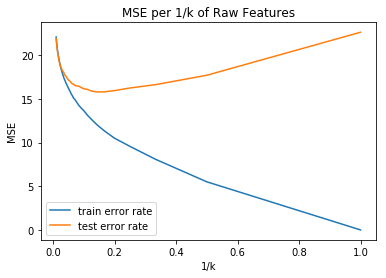

In [40]:
# 1. raw features (test error: testER)
# train error rate: trainER

dic = dict ()
for i in range(100):
    k=i+1   # k = 1,2,3,..,100
    predtr = KNN (X_train, y_train, k, X_train)   # testing train data
    
    # calculating error rate
    mse_tr = mean_squared_error(y_train, predtr) # MSE of train data    
    dic[i] = k, mse_tr
    
trainER = pd.DataFrame(dic, ["k","MSE_train"]).T

# plot (raw features)
plt.plot(1/trainER.iloc[:,0], trainER.iloc[:,1])  # train error rate
plt.plot(1/testER.iloc[:,0], testER.iloc[:,1])    # test error rate

plt.title('MSE per 1/k of Raw Features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend(['train error rate', 'test error rate'])
plt.show()

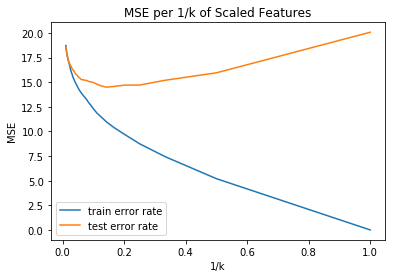

In [41]:
# 2. normalized features (scaling, standardization)
#    A. Scaling (scX_tr, scX_te, y_train, y_test)
#       test error rate: stestER
#       train error rate: strainER

dic = dict ()
for i in range(100):
    k=i+1   # k = 1,2,3,..,100
    predtr = KNN (scX_tr, y_train, k, scX_tr)   # testing train data
   
    # calculating error rate
    mse_tr = mean_squared_error(y_train, predtr) # MSE of train data    
    dic[i] = k, mse_tr
    
strainER = pd.DataFrame(dic, ["k","MSE_train"]).T

# plot (Scaled features)
plt.plot(1/strainER.iloc[:,0], strainER.iloc[:,1])  # train error rate
plt.plot(1/stestER.iloc[:,0], stestER.iloc[:,1])    # test error rate

plt.title('MSE per 1/k of Scaled Features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend(['train error rate', 'test error rate'])
plt.show()

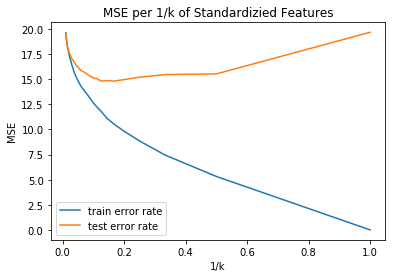

In [43]:
# 2. normalized features (scaling, standardization)
#    B. Standardization(stX_tr, stX_te, y_train, y_test)
#       test error rate: sdtestER
#       train error rate: sdtrainER

dic = dict ()
for i in range(100):
    k=i+1   # k = 1,2,3,..,100
    predtr = KNN (stX_tr, y_train, k, stX_tr)   # testing train data
    
    # calculating error rate
    mse_tr = mean_squared_error(y_train, predtr) # MSE of train data    
    dic[i] = k, mse_tr
    
sdtrainER = pd.DataFrame(dic, ["k","MSE_train"]).T

# plot (Standardizied features)
plt.plot(1/sdtrainER.iloc[:,0], sdtrainER.iloc[:,1])  # train error rate
plt.plot(1/sdtestER.iloc[:,0], sdtestER.iloc[:,1])    # test error rate

plt.title('MSE per 1/k of Standardizied Features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend(['train error rate', 'test error rate'])
plt.show()

1. (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [44]:
# Linear regression model (the result from 1. (h))
print(mse_tb)

         Train MSE   Test MSE
Model 1  17.876685  18.037558
Model 2  17.853785  18.010836


KNN regression (the result from 1. (i)

1. raw features
k*= 7 with best test error: 15.798
2. scaled features
k*= 7 with best test error: 14.499
3. standardized features
k*= 8 with best test error: 14.814

<Analysis>
The test error rates of the KNN regression models despite raw or normalized features are smaller than those of the linear regression model. 
When using KNN regression model with k=7 and scaled featured, the lowest test error 14.499 is obtained. 

2. ISLR: 2.4.1

1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a ﬂexible statistical learning method to be better or worse than an inﬂexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small. 

(answer) A Flexible method would be better because it could obtain an accurate estimation model with the large samples, and complexity would not be high because of small p. 

(b) The number of predictors p is extremely large, and the number of observations n is small. 

(answer) A Flexible method would be worse because it could not obtain an accurate estimation model with the small samples, and complexity would be high because of large p. 

(c) The relationship between the predictors and response is highly non-linear. 

(answer) A Flexible method would be better because a inflexible method could not obtain an accurate estimation model because of the highly non-linear relationship.

(d) The variance of the error terms, i.e. σ2 = Var(e), is extremely high.

(answer) A Flexible method would be worse because an estimation model from the flexible method would be likely to highly overfit data because of the high variance. 

3. ISLR: 2.4.7

a training data set containing six observations, three predictors, and one qualitative response variable.

In [45]:
dic = dict ()
dic[1] = 0, 3, 0, 'Red'
dic[2] = 2, 0, 0, 'Red'
dic[3] = 0, 1, 3, 'Red'
dic[4] = 0, 1, 2, 'Green'
dic[5] = -1, 0, 1, 'Green'
dic[6] = 1, 1, 1, 'Red'

tbl = pd.DataFrame(dic, ["X1","X2","X3", "Y"]).T
tbl.columns.name='Obs.'
print(tbl)

Obs.  X1 X2 X3      Y
1      0  3  0    Red
2      2  0  0    Red
3      0  1  3    Red
4      0  1  2  Green
5     -1  0  1  Green
6      1  1  1    Red


Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [46]:
from scipy.spatial import distance # to get Euclidean distance

tst = [0, 0, 0]

dic = dict()
for i in range(6):
    tX = tbl.iloc[i, :3]
    ed = distance.euclidean(tst, tX)
    dic[i+1]=ed
    
ED = pd.DataFrame(dic, index=["Euclidean"]).T
ED.columns.name='Obs.'
ED_s=ED.sort_values(by=["Euclidean"])  # sorting
print(ED_s)

Obs.  Euclidean
5      1.414214
6      1.732051
2      2.000000
4      2.236068
1      3.000000
3      3.162278


(b) What is our prediction with K = 1? Why?

In [47]:
# Y of the nearst point from the test point
print(tbl.loc[5, 'Y'])

Green


The nearest point from the test point is "Obs. 5". Thus, prediction is green, the same as Y of Obs. 5.

(c) What is our prediction with K = 3? Why? 

In [48]:
# Ys of the three nearest points (Obs. 5, 6, 2)
print(tbl.loc[5, 'Y'])
print(tbl.loc[6, 'Y'])
print(tbl.loc[2, 'Y'])

Green
Red
Red


The prediction is red by majority polling because of one green and two red. 

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

The best K would be small. Because the Bayes decision boundary is ﬂexible when k is small, small K would be better to fit into nonlinear boundary. 